<a href="https://colab.research.google.com/github/will-cotton4/de-rust/blob/main/Project_Euler_15%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 15**

Starting in the top left corner of a 2×2 grid, and only being able to move to the right and down, there are exactly 6 routes to the bottom right corner.

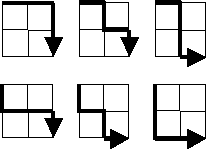

How many such routes are there through a 20×20 grid?

The question is one of combinatorics: how many
ways can we add (0,1) or (1,0) to (0, 0) in order to get (20, 20)?

We can model these as strings: bitstrings, to be precise, but for legibility
we will use the character 'R' to denote a move to the right, and 'D' a move
down.

In this notation, the paths in the top three rows would be, respectively:
RRDD, RDRD, RDDR
and in the bottom three:
DRRD, DRDR, DDRR

Clearly, there must be 20 Rs and 20 Ds. The question is: **how many such strings are there?**

In [ ]:
# The solution is simple with combinatorics.
# Effectively, we have 40 slots, of which we want to "choose" 20 to be R. We
# could, of course, just "choose" 20 to be D.

# The formula is C(n, r) = n! / ((n-r)! r!)

import math
paths = math.factorial(40)/ (math.factorial(20) * math.factorial(20)) 
print(paths)

**Problem 16**

2^15 = 32768 and the sum of its digits is 3 + 2 + 7 + 6 + 8 = 26.

What is the sum of the digits of the number 2^1000?

In [ ]:
# Cast as string
str_num = str(2**1000)
# Use list comprehension to sum digits
sum_dig = sum([int(digit) for digit in str_num])
print(sum_dig)

**Problem 17**

If the numbers 1 to 5 are written out in words: one, two, three, four, five, then there are 3 + 3 + 5 + 4 + 4 = 19 letters used in total.

If all the numbers from 1 to 1000 (one thousand) inclusive were written out in words, how many letters would be used?


NOTE: Do not count spaces or hyphens. For example, 342 (three hundred and forty-two) contains 23 letters and 115 (one hundred and fifteen) contains 20 letters. The use of "and" when writing out numbers is in compliance with British usage.

In [ ]:
# We create a function to translate a number from one to one thousand inclusive

def num_to_words(number):
  ones_place = number % 10
  tens_place = (number % 100 - ones_place)

  # note that this will return a value between 0 and 9, whereas tens_place
  # returns a multiple of ten. This is because multiples of ten have different
  # names.
  hundreds_place = (number % 1000 - tens_place - ones_place)/100

  number_names = {
      0 : "",
      1 : "one",
      2 : "two",
      3 : "three",
      4 : "four",
      5 : "five",
      6 : "six",
      7 : "seven",
      8 : "eight",
      9 : "nine",
      10: "ten",
      11: "eleven",
      12: "twelve",
      13: "thirteen",
      14: "fourteen",
      15: "fifteen",
      16: "sixteen",
      17: "seventeen",
      18: "eighteen",
      19: "nineteen",
      20: "twenty",
      30: "thirty",
      40: "forty",
      50: "fifty",
      60: "sixty",
      70: "seventy",
      80: "eighty",
      90: "ninety",
      1000: "one thousand"
  }
  if(number <= 20 or number == 1000):
    return number_names[number]

  number_in_english = ''
  if(hundreds_place != 0):
    number_in_english += number_names[hundreds_place] + ' hundred'

  if(tens_place != 0):
    if(hundreds_place != 0):
      number_in_english += ' and '
      if(tens_place == 10):
        number_in_english += number_names[(tens_place)+(ones_place)]
      else:
        number_in_english += number_names[tens_place]
    else:
      number_in_english += number_names[tens_place]
  if(ones_place != 0 and tens_place != 10):
    if(hundreds_place != 0 and tens_place == 0):
      number_in_english += ' and '
      number_in_english += number_names[ones_place]
    else: 
      number_in_english += ' '
      number_in_english += number_names[ones_place]
  return number_in_english

In [ ]:
num_to_words(111)

In [ ]:
num_letters = 0
for i in range(1,1001):
  print(num_to_words(i))
  num_letters += len(num_to_words(i)) - num_to_words(i).count(' ')
print(num_letters)

**Problem 18**

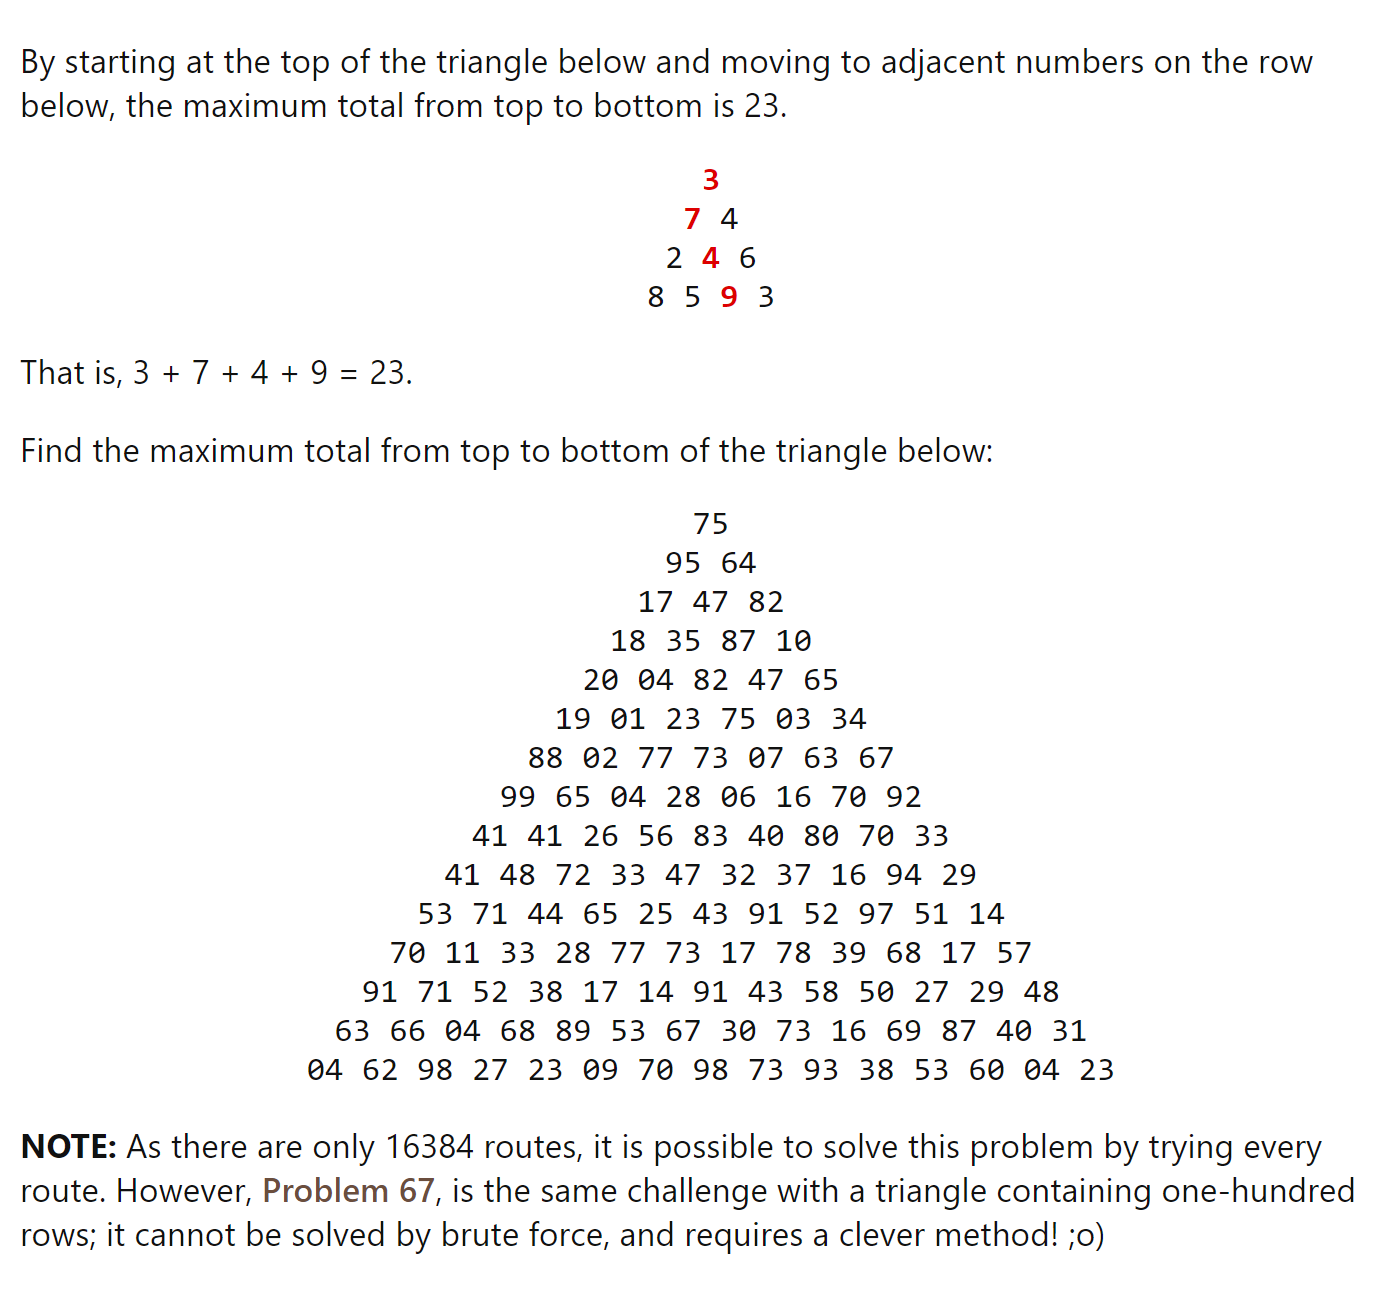

In [ ]:
triangle = [
	[75],
	[95, 64],
	[17, 47, 82],
	[18, 35, 87, 10],
	[20, 4, 82, 47, 65],
	[19, 1, 23, 75, 3, 34],
	[88, 2, 77, 73, 7, 63, 67],
	[99, 65, 4, 28, 6, 16, 70, 92],
	[41, 41, 26, 56, 83, 40, 80, 70, 33],
	[41, 48, 72, 33, 47, 32, 37, 16, 94, 29],
	[53, 71, 44, 65, 25, 43, 91, 52, 97, 51, 14],
	[70, 11, 33, 28, 77, 73, 17, 78, 39, 68, 17, 57],
	[91, 71, 52, 38, 17, 14, 91, 43, 58, 50, 27, 29, 48],
	[63, 66, 4, 68, 89, 53, 67, 30, 73, 16, 69, 87, 40, 31],
	[4, 62, 98, 27, 23, 9, 70, 98, 73, 93, 38, 53, 60, 4, 23]
]

# Problem 19

You are given the following information, but you may prefer to do some research for yourself.

- 1 Jan 1900 was a Monday.
- Thirty days has September,

- April, June and November.
- All the rest have thirty-one,
- Saving February alone,
- Which has twenty-eight, rain or shine.
- And on leap years, twenty-nine.
- A leap year occurs on any year evenly divisible by 4, but not on a century unless it is divisible by 400.


How many Sundays fell on the first of the month during the twentieth century (1 Jan 1901 to 31 Dec 2000)?

In [20]:
class Date:
  
  def __init__(self, day_of_week, day_of_month, month, year):
    self.day_of_week = day_of_week
    self.day_of_month = day_of_month
    self.month = month
    self.year = year

  # dictionary storing max dates per month
  max_date = {
      0: 31,
      1: 28,
      2: 31,
      3: 30,
      4: 31,
      5: 30,
      6: 31,
      7: 31,
      8: 30,
      9: 31,
      10: 30,
      11: 31
  }
  
  def next_day(self):
    self.day_of_week = (self.day_of_week + 1) % 7

    # Leap years
    if((self.year % 4) == 0 & (self.year % 100 != 0)):
      self.max_date[1] = 29
    # No month change
    if (self.day_of_month < self.max_date[self.month]):
      self.day_of_month += 1
    # Month change
    elif (self.day_of_month == self.max_date[self.month]):
      self.day_of_month = 1
      self.month = (self.month + 1) % 12
      # Check year
      if(self.month == 0):
        self.year += 1
    return self
  def date_print(self):
    days_of_week = {
        0: "Sunday",
        1: "Monday",
        2: "Tuesday",
        3: "Wednesday",
        4: "Thursday",
        5: "Friday",
        6: "Saturday"
    }
    print("Day of Week: ", days_of_week[self.day_of_week], "\n")
    print("Day of Month: ", self.day_of_month, "\n")
    print("Month: ", self.month+1, "\n")
    print("Year: ", self.year)
    print("----")

In [ ]:
day = Date(1,1,0,1900)
sunday_count = 0
# 1901 2
# 1902 2
# 1903 1
# 1904 1
while day.year < 1902:
  if((day.day_of_week == 0) & (day.day_of_month == 1)):
    sunday_count += 1
    day.date_print()
  day = day.next_day()
  #day.date_print()

print(sunday_count)

Why am I doing this from scratch?

In [49]:
import calendar

print(calendar.monthrange(1900, 7)[0])

6


In [57]:
sunday_count = 0
for year in range(1901, 2001):
  for month in range (1, 13):
    if calendar.monthrange(year, month)[0] == 6:
      sunday_count+=1

print(sunday_count)

171


#Problem 20
